In [89]:
import pandas as pd


In [95]:
df=pd.read_csv('cricket.csv')
df

,a,b,c,d,e
0,100,95,60,30,507
1,125,80,75,43,100
2,30,30,45,53,804
3,25,86,87,36,570
4,54,87,23,54,637
5,23,45,65,12,562
6,12,25,54,12,878


In [91]:
------------------co-relation---------------------------

SyntaxError: invalid syntax (3568948821.py, line 1)

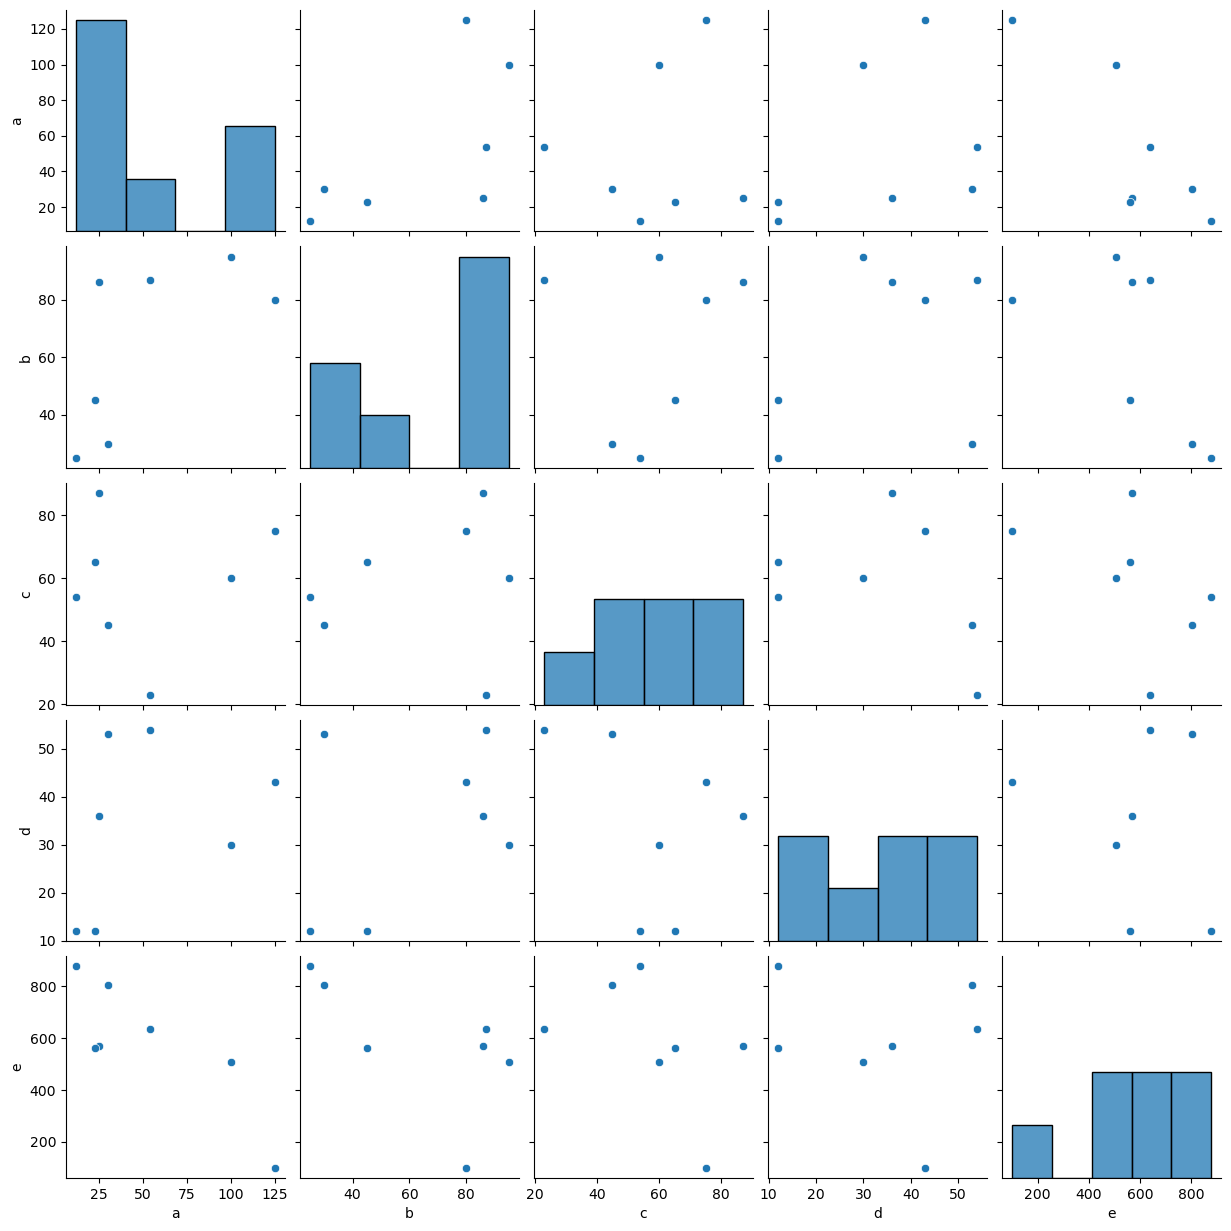

In [96]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)


<AxesSubplot:>

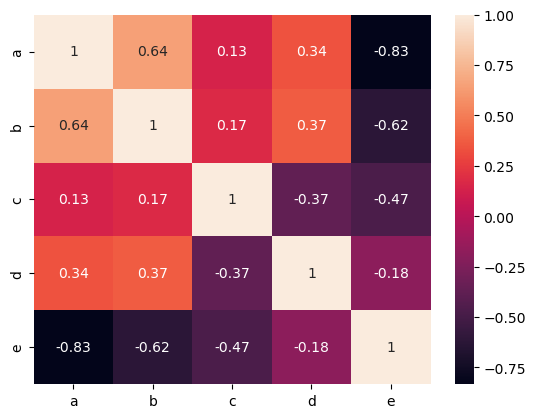

In [97]:
sns.heatmap(df.corr(),annot=True)

In [112]:
import numpy as np
x=df['d']
x
y=df['e']
y



# x=np.array(df["virat"])
# # y=np.array(df[Team].reshape(-1,1))

0    507
1    100
2    804
3    570
4    637
5    562
6    878
Name: e, dtype: int64

In [114]:
x=np.array(df['d'])
y=np.array(df['e'])

In [115]:
x

array([30, 43, 53, 36, 54, 12, 12], dtype=int64)

In [107]:
y

array([507, 100, 804, 570, 637, 562, 878], dtype=int64)

In [117]:
x=x.reshape(-1,1)

In [109]:
y=y.reshape(-1,1)

In [110]:
y

array([[507],
       [100],
       [804],
       [570],
       [637],
       [562],
       [878]], dtype=int64)

In [118]:
x

array([[30],
       [43],
       [53],
       [36],
       [54],
       [12],
       [12]], dtype=int64)

In [119]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [129]:
actual=np.array([507,100,878,637,804])
test=np.array([30,43,53,36,12]).reshape(-1,1)
predict=model.predict(test).reshape(-1,1)

In [126]:
predict

array([[590.98578791],
       [556.79556458],
       [530.49539278],
       [575.20568484],
       [638.32609714]])

In [151]:
predict=predict.flatten()
df1=pd.DataFrame({"actual":actual,"predict":predict})
df1["diff"]=df1["actual"]-df1["predict"]
df1

,actual,predict,diff
0,507,590.985788,-83.985788
1,100,556.795565,-456.795565
2,878,530.495393,347.504607
3,637,575.205685,61.794315
4,804,638.326097,165.673903


In [152]:
df1['RSS']=df1['actual']-df1['predict']
df1
df1['RSS_squre']=df1['RSS']**2
df1

,actual,predict,diff,RSS,RSS_squre
0,507,590.985788,-83.985788,-83.985788,7053.612571
1,100,556.795565,-456.795565,-456.795565,208662.187819
2,878,530.495393,347.504607,347.504607,120759.452036
3,637,575.205685,61.794315,61.794315,3818.537387
4,804,638.326097,165.673903,165.673903,27447.842088


In [153]:
df1['RSS_squre']=df1['RSS']**2
df1

,actual,predict,diff,RSS,RSS_squre
0,507,590.985788,-83.985788,-83.985788,7053.612571
1,100,556.795565,-456.795565,-456.795565,208662.187819
2,878,530.495393,347.504607,347.504607,120759.452036
3,637,575.205685,61.794315,61.794315,3818.537387
4,804,638.326097,165.673903,165.673903,27447.842088


In [157]:
mean=df1['actual'].mean()
df1

,actual,predict,diff,RSS,RSS_squre,actual_mean
0,507,590.985788,-83.985788,-83.985788,7053.612571,585.2
1,100,556.795565,-456.795565,-456.795565,208662.187819,585.2
2,878,530.495393,347.504607,347.504607,120759.452036,585.2
3,637,575.205685,61.794315,61.794315,3818.537387,585.2
4,804,638.326097,165.673903,165.673903,27447.842088,585.2


In [159]:
df1["TSS"]=(df1["actual"]-mean)**2
df1

,actual,predict,diff,RSS,RSS_squre,actual_mean,TSS
0,507,590.985788,-83.985788,-83.985788,7053.612571,585.2,6115.24
1,100,556.795565,-456.795565,-456.795565,208662.187819,585.2,235419.04
2,878,530.495393,347.504607,347.504607,120759.452036,585.2,85731.84
3,637,575.205685,61.794315,61.794315,3818.537387,585.2,2683.24
4,804,638.326097,165.673903,165.673903,27447.842088,585.2,47873.44


In [160]:
df1["R**2"]= (df1['TSS']-df1['RSS'])/df1['TSS']

In [161]:
df1

,actual,predict,diff,RSS,RSS_squre,actual_mean,TSS,R**2
0,507,590.985788,-83.985788,-83.985788,7053.612571,585.2,6115.24,1.013734
1,100,556.795565,-456.795565,-456.795565,208662.187819,585.2,235419.04,1.001940
2,878,530.495393,347.504607,347.504607,120759.452036,585.2,85731.84,0.995947
3,637,575.205685,61.794315,61.794315,3818.537387,585.2,2683.24,0.976970
4,804,638.326097,165.673903,165.673903,27447.842088,585.2,47873.44,0.996539
